# Heart Disease Information Data

In [2]:
import pandas as pd

df= pd.read_csv("heart-disease-uci.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Feature Selection

In [5]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
df_selection = sel.fit_transform(df)
df_selection.shape

(303, 10)

# Prepare Heart Disease Dataset Cleveland

In [6]:
# organize imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout

# seed for reproducing same results
seed = 9
np.random.seed(seed)

# load heart disease dataset
dataset = np.loadtxt('heart-disease-uci.csv', delimiter=',', skiprows=1)

# split into input and output variables
X = dataset[:,0:13]
Y = dataset[:,13]

# split the data into training (90%) and testing (10%)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.10, random_state=seed)

In [7]:
# Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

model_scaler= MinMaxScaler().fit(X_train)
X_train_scale = model_scaler.transform(X_train)
X_test_scale = model_scaler.transform(X_test)

In [8]:
X_train_scale

array([[0.4375    , 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.        , ..., 0.5       , 0.75      ,
        1.        ],
       [0.375     , 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.29166667, 1.        , 0.        , ..., 0.5       , 1.        ,
        1.        ],
       [0.39583333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.375     , 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667]])

In [9]:
X_train_scale.shape

(272, 13)

In [10]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Create DNN Model

In [22]:
# create the model
model = Sequential()
model.add(Dense(150, input_dim=13, activation='relu'))
model.add(Dense(140, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # ada 2 kelas, multiclass softmax

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X_train_scale, Y_train, validation_data=(X_test_scale, Y_test), epochs=100, verbose=1)
# evaluate the model training
scores = model.evaluate(X_train_scale, Y_train)
print("Accuracy Training: %.2f%%" % (scores[1]*100))

# evaluate the model testing
scores = model.evaluate(X_test_scale, Y_test)
print("Accuracy Testing: %.2f%%" % (scores[1]*100))

Epoch 1/100
9/9 [==============================] - 0s 15ms/step - loss: 0.6371 - accuracy: 0.7059 - val_loss: 0.5649 - val_accuracy: 0.8387
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5158 - accuracy: 0.8015 - val_loss: 0.4649 - val_accuracy: 0.8387
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4209 - accuracy: 0.8235 - val_loss: 0.4423 - val_accuracy: 0.7419
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8382 - val_loss: 0.4176 - val_accuracy: 0.8387
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3577 - accuracy: 0.8493 - val_loss: 0.4653 - val_accuracy: 0.8065
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.8713 - val_loss: 0.5135 - val_accuracy: 0.7742
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.8713 - val_loss: 0.4591 - val_accuracy: 0.8387
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 6ms/step - loss: 0.0689 - accuracy: 0.9706 - val_loss: 0.6893 - val_accuracy: 0.7742
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9706 - val_loss: 1.1316 - val_accuracy: 0.7097
Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0563 - accuracy: 0.9816 - val_loss: 0.7302 - val_accuracy: 0.7419
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 1.0485 - val_accuracy: 0.7419
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.7328 - val_accuracy: 0.8065
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0421 - accuracy: 0.9853 - val_loss: 0.9108 - val_accuracy: 0.7419
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9926 - val_loss: 0.6610 - val_accuracy: 0.7742
Epoch 66/100
9/9 [===============

# Visualize Model Traning History

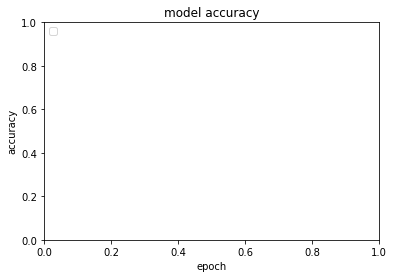

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Probability Distribution of Classes (PDF) 

In [ ]:
def pdf(x, std, mean):
    cons = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = cons*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist

x = np.linspace(0, 1, num=303)
normal_pdf = pdf(x,0.1,0.4)
disease_pdf = pdf(x,0.1,0.6)

#let’s create a function to plot the distributions.
def plot_pdf(normal_pdf, disease_pdf, ax):
    ax.fill(x, normal_pdf, "g", alpha=0.5)
    ax.fill(x, disease_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="Heart Disease")', fontsize=12)
    ax.legend(["Normal","Heart Disease"])

In [ ]:
#let’s use this plot_pdf function to generate the plot
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(normal_pdf, disease_pdf, ax)

# Create the ROC Plot Function

In [ ]:
def plot_roc(normal_pdf, disease_pdf, ax):
    #Total
    total_disease = np.sum(disease_pdf)
    total_normal = np.sum(normal_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of disease
        if disease_pdf[i]>0:
            cum_TP+=disease_pdf[len(x)-1-i]
            cum_FP+=normal_pdf[len(x)-1-i]
        FPR=cum_FP/total_normal
        TPR=cum_TP/total_disease
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 303 timesteps into account
    auc=np.sum(TPR_list)/303
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('True Positive Rate (TPR)', fontsize=12)
    ax.set_xlabel('False Positive Rate (FPR)', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

In [ ]:
#plot_roc function to generate the plot
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc(normal_pdf, disease_pdf, ax)

# Make Prediction (For New Data)

In [ ]:
#organize imports
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# seed for reproducing same results
seed = 9
np.random.seed(seed)

# load heart disease dataset
dataset = np.loadtxt('heart-disease-uci.csv', delimiter=',', skiprows=1)

# split into input and output variables
X = dataset[:,0:13]
Y = dataset[:,13]

# create the model
model = Sequential()
model.add(Dense(14, input_dim=13, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=158, batch_size=5, verbose=0)

# calculate predictions
predictions = model.predict(X)

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)
